### Simple example of linear regression

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

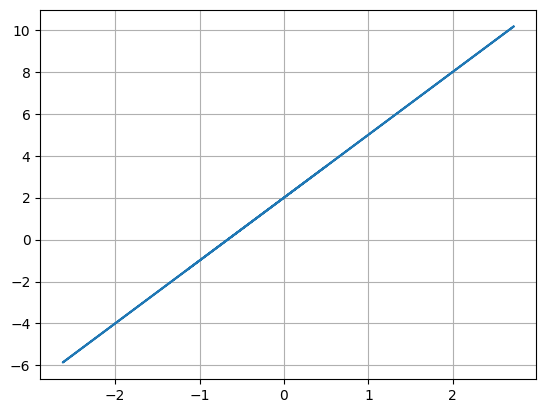

In [2]:
# Import data from files
x_train = np.loadtxt("x_train.csv", delimiter=",")
y_train = np.loadtxt("y_train.csv", delimiter=",")
x_test = np.loadtxt("x_test.csv", delimiter=",")
y_test = np.loadtxt("y_test.csv", delimiter=",")

# Plot train data
plt.plot(x_train, y_train)
plt.grid()
plt.show()

Creation of the sequential model formed by a single layer of _Dense_ type, which as params to be learned has only (`a`, `b`) of the equation $y = ax+b$

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2023-02-22 12:34:17.319723: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-02-22 12:34:17.319760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: pop-os
2023-02-22 12:34:17.319766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: pop-os
2023-02-22 12:34:17.319853: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.85.5
2023-02-22 12:34:17.319874: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2023-02-22 12:34:17.319880: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.65.1 does not match DSO version 525.85.5 -- cannot find working devices in this configuration
2023-02-22 12:34:17.32

Definition of the model complilator, with the loss parameter we go to specify how to calculate the loss, in this case with mean_squared_error $\frac{1}{n}\sum_{i = 0}^m (\tilde{Y_i} - Y_i)^2$) and with the optimizer parameter we go to define the update algorithm the parameters

In [4]:
# Complier settings
model.compile(
    loss = tf.keras.losses.mean_squared_error,
    optimizer = tf.keras.optimizers.Adam()
)

In [5]:
# Train model
history = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 15.1104
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 15.0390
Epoch 3/1000
7/7 [==============================] - 0s 877us/step - loss: 14.9759
Epoch 4/1000
7/7 [==============================] - 0s 853us/step - loss: 14.9107
Epoch 5/1000
7/7 [==============================] - 0s 875us/step - loss: 14.8463
Epoch 6/1000
7/7 [==============================] - 0s 1ms/step - loss: 14.7796
Epoch 7/1000
7/7 [==============================] - 0s 1ms/step - loss: 14.7149
Epoch 8/1000
7/7 [==============================] - 0s 1ms/step - loss: 14.6543
Epoch 9/1000
7/7 [==============================] - 0s 974us/step - loss: 14.5878
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: 14.5248
Epoch 11/1000
7/7 [==============================] - 0s 925us/step - loss: 14.4613
Epoch 12/1000
7/7 [==============================] - 0s 970us/step - loss: 14.3941
Epoch 13/1000
7/7 [======

In [6]:
# Make predictions
y_predict = model.predict(x_test)

# Relation between correct values and predicted values
np.c_[y_test, y_predict]

7/7 [==============================] - 0s 1ms/step


array([[ 3.49014246,  3.48528862],
       [ 1.5852071 ,  1.58585143],
       [ 3.94306561,  3.93690467],
       [ 6.56908957,  6.55534935],
       [ 1.29753988,  1.29901445],
       [ 1.29758913,  1.29906356],
       [ 6.73763845,  6.72341156],
       [ 4.30230419,  4.29510641],
       [ 0.59157684,  0.59508896],
       [ 3.62768013,  3.62242937],
       [ 0.60974692,  0.61320662],
       [ 0.60281074,  0.60629046],
       [ 2.72588681,  2.72323895],
       [-3.73984073, -3.72382712],
       [-3.1747535 , -3.16037107],
       [ 0.31313741,  0.31745327],
       [-1.03849336, -1.03027654],
       [ 2.942742  ,  2.93946815],
       [-0.72407223, -0.71676278],
       [-2.2369111 , -2.22523522],
       [ 6.39694631,  6.38370323],
       [ 1.3226711 ,  1.32407308],
       [ 2.20258461,  2.20144701],
       [-2.27424456, -2.26246095],
       [ 0.36685183,  0.37101245],
       [ 2.33276777,  2.33125448],
       [-1.45298073, -1.44356751],
       [ 3.12709406,  3.12328815],
       [ 0.19808393,

Comparison of the two graphs, the first formed by the corrected data from the test dataset and the second with the data predicted by the model

Text(0.5, 1.0, 'Predict values')

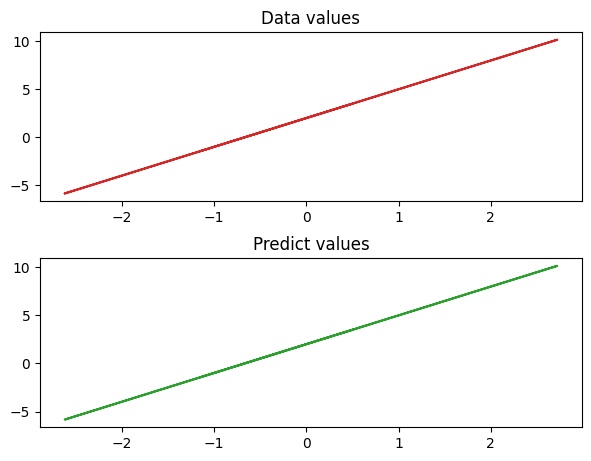

In [28]:

fig, axs = plt.subplots(2)
fig.tight_layout(pad=2)
axs[0].set_title("Data values")
axs[0].plot(x_test, y_test, 'tab:red')
axs[1].plot(x_test, y_predict, 'tab:green')
axs[1].set_title("Predict values")


Loss graph

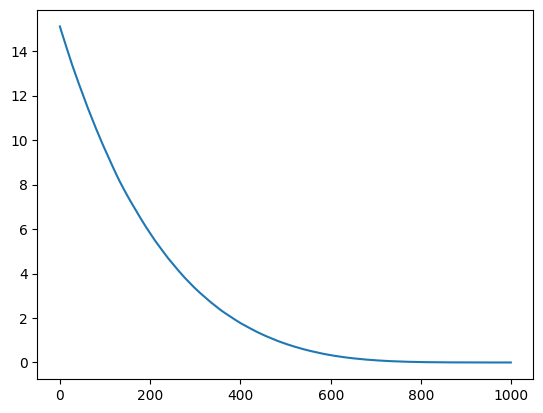

In [9]:
loss_hist = history.history['loss']
plt.plot(range(1000), loss_hist)